In [ ]:
# Menghubungkan dengan gdrive
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
data_list = listdir('drive/MyDrive/SkripsiData224/dataKmeans')

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf


DATASET_PATH  = 'drive/MyDrive/SkripsiData224/dataKmeans'
#test_dir =  'drive/MyDrive/SkripsiData224/testKmeans'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0005 




#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.25,
                                   fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  
                                                 
                                                  )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras import models
from keras import layers
#from keras_applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Conv2D, MaxPool2D

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              
              optimizer='Adam',
              metrics=['acc'])

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [ ]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS)

300
100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
300/300 [==============================] - 1904s 6s/step - loss: 0.5288 - acc: 0.8207 - val_loss: 0.5734 - val_acc: 0.7630
Epoch 2/10
300/300 [==============================] - 1814s 6s/step - loss: 0.3199 - acc: 0.8653 - val_loss: 0.4077 - val_acc: 0.8450
Epoch 3/10
300/300 [==============================] - 1815s 6s/step - loss: 0.3013 - acc: 0.8737 - val_loss: 0.1747 - val_acc: 0.9300
Epoch 4/10
300/300 [==============================] - 1814s 6s/step - loss: 0.2647 - acc: 0.8910 - val_loss: 0.3037 - val_acc: 0.8750
Epoch 5/10
300/300 [==============================] - 1866s 6s/step - loss: 0.2616 - acc: 0.8897 - val_loss: 0.1550 - val_acc: 0.9380
Epoch 6/10
300/300 [==============================] - 1866s 6s/step - loss: 0.2567 - acc: 0.8927 - val_loss: 0.1549 - val_acc: 0.9470
Epoch 7/10
300/300 [==============================] - 1818s 6s/step - loss: 0.2421 - acc: 0.8940 - val_loss: 0.1656 - val_acc: 0.9320
Epoch 8/10
300/300 [==============================] - 1815s 6s

In [ ]:
#model.save('drive/MyDrive/SkripsiData/models/VGG16_Adam.h5')

In [ ]:
#model.save('drive/MyDrive/SkripsiData/models/VGG16_SGD.h5')

In [ ]:
#model.save('drive/MyDrive/SkripsiData/models/VGG16_Adagrad.h5')

In [ ]:
#model.save('drive/MyDrive/SkripsiData/models/VGG16_RMSProp.h5')

In [ ]:
model.save('drive/MyDrive/SkripsiData/models/VGG16_Nadam.h5')

In [ ]:
import keras
from keras import models
model = keras.models.load_model('drive/MyDrive/SkripsiData/models/VGG16_fix2.h5')

In [ ]:
import keras
from keras import models
model = keras.models.load_model('drive/MyDrive/SkripsiData/models/VGG16_SGD.h5')

In [ ]:
import keras
from keras import models
model = keras.models.load_model('drive/MyDrive/SkripsiData/models/VGG16_Adagrad.h5')

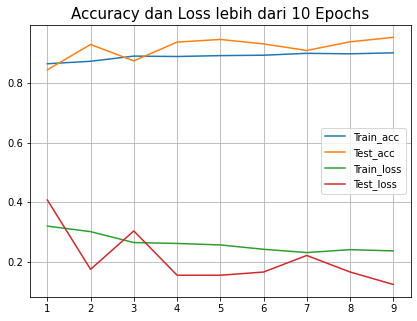

In [ ]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
#from keras_applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Conv2D, MaxPool2D

def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Accuracy dan Loss lebih dari ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

# Grafik Optimizer Adagrad



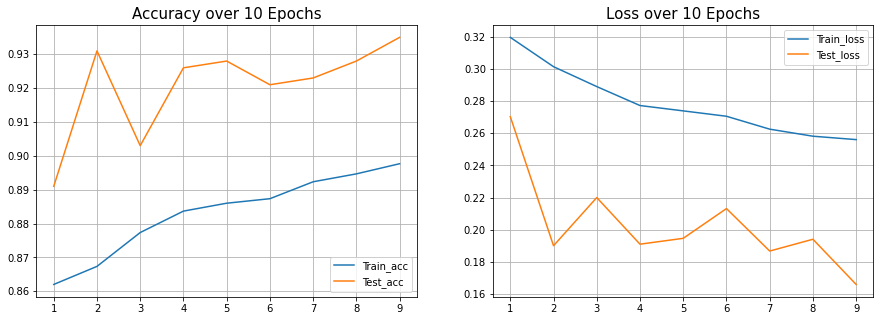

In [ ]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
#from keras_applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Conv2D, MaxPool2D

def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

# Grafik Optimizer RMSProp

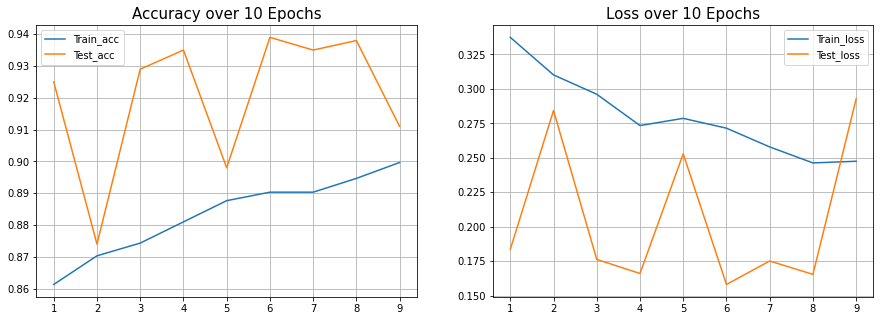

In [ ]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
#from keras_applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Conv2D, MaxPool2D

def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

In [ ]:
eval_dir="drive/MyDrive/SkripsiData224/dataKmeans"
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        eval_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        class_mode="binary")
eval_generator.reset() 

Found 4000 images belonging to 2 classes.


In [ ]:
#train_batches.reset()  
#result=model.predict_generator(eval_generator,4000,verbose=1)
#result=model.predict_generator(train_batches,300,verbose=1)
eval_generator.reset()
pred = model.predict_generator(eval_generator,4000,verbose=1)
print("Predictions finished")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


4000/4000 [==============================] - 1857s 464ms/step
Predictions finished


In [ ]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
x=0; y=0; z=0; a=0;

for index, probability in enumerate(pred):
    #image_path = DATASET_PATH + "/" +train_batches.filenames[index]
    image_path = eval_dir + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = np.array(image)
    #plt.imshow(pixels)
    
    #print(eval_generator.filenames[index])
    if probability > 0.5:
        #plt.title("%.2f" % (probability[0]*100) + "% Normal")
        if x+y>2000:
          z+=1
        else: x+=1
    else:
        #plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19")
        if x+y>2000:
          a+=1
        else: y+=1
    #plt.show()
print("FN =", x/4)
print("TP =", y/4)
print("TN =", z/4)
print("FP =", a/4)
k=(y+z)/(y+a+x+z)
l=(y) / (y+a)
m=(y) / (y+x)
n=2 * (m*l) / (m + l)
print("Accuracy:", k)
print("Precission:", l)
print("Recall:", m)
print("F1 Score:", n)

FN = 58.5
TP = 441.75
TN = 468.5
FP = 31.25
Accuracy: 0.91025
Precission: 0.9339323467230444
Recall: 0.8830584707646177
F1 Score: 0.9077832006164912


In [ ]:
# from keras.models import load_model
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import decode_predictions
# from keras.applications.vgg16 import VGG16
# import numpy as np
 
# from keras.models import load_model
 
# model = load_model('drive/MyDrive/SkripsiData/models/VGG16_Adam.h5')
 
# image = load_img('drive/MyDrive/SkripsiData224/trainKmeans/normal/segmentedKMeans_enhanced_2 (1500).jpg', target_size=(224, 224))
# #image = load_img('drive/MyDrive/SkripsiData/trainKmeans/covid/segmentedKMeans_enhanced_1 (1500).jpg', target_size=(64, 64))

# img = np.array(image)
# img = img / 255.0
# img = img.reshape(1,224,224,3)
# label = model.predict(img)
# #label = model.predict_classes(img)
# print("Predicted Class (0 - Covid , 1- Normal): ", label[0][0])

In [ ]:
# import matplotlib.pyplot as plt


# def plot_acc_loss(result, epochs):
#     acc = result.history['acc']
#     loss = result.history['loss']
#     val_acc = result.history['val_acc']
#     val_loss = result.history['val_loss']
#     plt.figure(figsize=(15, 5))
#     plt.subplot(121)
#     plt.plot(range(1,epochs), acc[1:], label='Train_acc')
#     plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
#     plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
#     plt.legend()
#     plt.grid(True)
#     plt.subplot(122)
#     plt.plot(range(1,epochs), loss[1:], label='Train_loss')
#     plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
#     plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
#     plt.legend()
#     plt.grid(True)
#     plt.show()
    
# plot_acc_loss(result, 5)

In [ ]:
# eval_generator.reset()  
# x = model.evaluate_generator(eval_generator,
#                            steps = np.ceil(len(eval_generator) / BATCH_SIZE),
#                            use_multiprocessing = False,
#                            verbose = 1,
#                            workers=1
#                            )


# print('Test loss:' , x[0])
# print('Test accuracy:',x[1])